In [78]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinReg:

# __init__ is the computerpower of this class

    def __init__(self, max_iter=1000, eta0=0.01):
        self.max_iter = max_iter
        self.eta0 = eta0
        self.intercept_ = None
        self.coef_ = None

# Our weights is our manipulated data through each iteration.
# However, they need a call before they can be initialize. Hence this function.
    def _initialize_weights(self, n_features):
        self.intercept_ = 0.0
        self.coef_ = np.zeros(n_features)

    def _compute_gradients(self, X, y):
        n_samples = X.shape[0]                             
        predictions = self.intercept_ + np.dot(X, self.coef_)
        error = y - predictions
        grad_intercept = -2 * np.mean(error) 
        grad_coef = -2 * np.dot(X.T, error) / n_samples

        print(f"This is our interception: {self.intercept_}")
        print(f"This is our coefficient: {self.coef_}")
        print("-----")
        print(f"This is the amount of samples we have in our data: {n_samples} & {y}")
        print(f"This is our predictions, our linear line: {predictions} & {np.dot(X, self.coef_)} ")
        print(f"This is the error between our predicted value and the y-data points: {error}")
        print(f"This is the gradient of our constant: {grad_intercept}")
        print(f"This is the gradient of our coefficient: {grad_coef}")
        print("")
        return grad_intercept, grad_coef


# When we fit our data we run through every iteration.
# First time we run through it our intercept and coefficient is o.
# However for each iteration our last gradient intercept and coefficient is our new intercept and coefficient that is surpassed to all functions using the variable.

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        for i in range(self.max_iter):                    # iterates over the entered amount entered itertions.
            print(f"This is iteration {i+1}")
            grad_intercept, grad_coef = self._compute_gradients(X, y)
            self.intercept_ -= self.eta0 * grad_intercept # Learning rate multiplied by the gradient of our intercept [a + x * b] => gradient(a) -> Creating a new intercept
            self.coef_ -= self.eta0 * grad_coef           # Learning rate multiplied by the gradient of our coefficient [a + x * b] => gradient(b) -> Creating a new coefficient

# Our prediction is our y-point data from our guess: y_pred = a + x * c
# Each call will contain new intercepts and new coefficients
    def predict(self, X):
        return self.intercept_ + np.dot(X, self.coef_)

    def score(self, X, y):
        predictions = self.predict(X)
        u = ((y - predictions) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()    
        return [1 - u / v, u, v]

This is interation 1
This is our interception: 0.0
This is our coefficient: [0.]
-----
This is the amount of samples we have in our data: 4 & [5.97396028 7.24897834 4.86609388 3.51245674]
This is our predictions, our linear line: [0. 0. 0. 0.] & [0. 0. 0. 0.] 
This is the error between our predicted value and the y-data points: [5.97396028 7.24897834 4.86609388 3.51245674]
This is the gradient of our constant: -10.800744620000001
This is the gradient of our coefficient: [-8.77537619]

This is interation 2
This is our interception: 4.320297848000001
This is our coefficient: [3.51015048]
-----
This is the amount of samples we have in our data: 4 & [5.97396028 7.24897834 4.86609388 3.51245674]
This is our predictions, our linear line: [7.24791782 9.37719259 4.32110079 6.4427635 ] & [2.92761998e+00 5.05689474e+00 8.02945640e-04 2.12246565e+00] 
This is the error between our predicted value and the y-data points: [-1.27395754 -2.12821425  0.54499309 -2.93030676]
This is the gradient of our 

0.45260799807744334

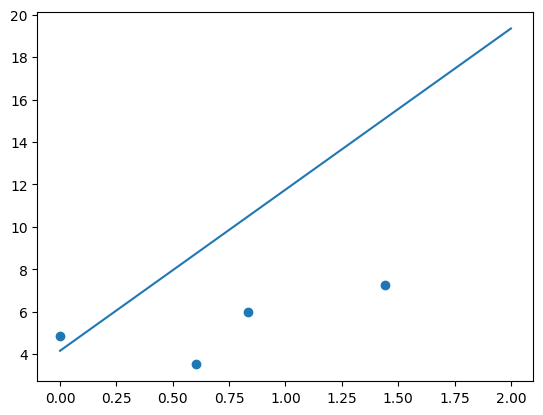

In [80]:
import matplotlib.pyplot as plt
def GenerateData():
    X = np.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = np.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

X, y = GenerateData()

model = MyLinReg(4,0.4)
model.fit(X,y)
model.predict(X)
model.score(X,y)
display(model.score(X,y)[0])
plt.scatter(X,y)
plt.plot(list(range(0,3)), [model.score(X,y)[1] + x * model.score(X,y)[2] for x in range(0,3)])

In [77]:
import sympy as sp
x, y, m, b, n, p = sp.symbols("x y m b n p")

a = (1/n) * ((m * x + b) - y)**2
tt = sp.diff(a,m)
c = sp.diff(a,b)
display(sp.simplify(tt),c)

2*x*(b + m*x - y)/n

(2*b + 2*m*x - 2*y)/n